In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
#直方圖與摺線圖需要深思熟慮一下

In [2]:
# import matplotlib as mpl

# mpl.rcParams['axes.labelsize'] = 10
# mpl.rcParams['xtick.labelsize'] = 10
# mpl.rcParams['ytick.labelsize'] = 10
# mpl.rcParams['legend.fontsize'] = 10
# mpl.rcParams['font.family'] = ['sans-serif']
# mpl.rcParams['font.sans-serif'] = ['Arial']
# mpl.rcParams['text.usetex'] = False
# mpl.rcParams['svg.fonttype'] = 'none'

In [4]:
want_data = '_val' # _train, _val
use_smooth = True
save_fig = True

show_label_start = 0
show_label_end = 50

def lbound(x):
    a = []
    for i in x:
        a.append(max(0.0,i))
    return a
def hbound(x):
    a = []
    for i in x:
        a.append(min(1.0,i))
    return a

In [4]:
#2
if 'train' in want_data:
    baseline_dl = [3.293517827987671, 3.2150814056396486, 3.0138514041900635, 2.399050998687744, 1.8864464521408082, 1.8064842224121094, 1.7463931560516357, 1.6381738424301147, 1.4969715356826783, 1.3957726240158081, 1.298223328590393, 1.2042699575424194, 1.1134011030197144, 1.0262481451034546, 0.9534106016159057, 0.8913405776023865, 0.8298004388809204, 0.7795039176940918, 0.7452423930168152, 0.7183407664299011, 0.6882552027702331, 0.6635205864906311, 0.6544955492019653, 0.6354733109474182, 0.6234924674034119, 0.6254611372947693, 0.5957239031791687, 0.5882133722305298, 0.5702546954154968, 0.5598153114318848, 0.5454111933708191, 0.529938280582428, 0.5242432117462158, 0.5127673923969269, 0.5027211248874665, 0.5021922767162323, 0.5014163434505463, 0.48809821009635923, 0.48127795457839967, 0.4762150526046753, 0.46903948187828065, 0.45966736078262327, 0.4566409945487976, 0.4542220115661621, 0.44897828698158265, 0.43747310638427733, 0.4327620446681976, 0.41990514397621154, 0.4127758741378784, 0.41898673176765444]
    baseline_la = [3.2956568241119384, 3.212844705581665, 2.989592456817627, 2.239936947822571, 1.842091727256775, 1.7881028175354003, 1.634268832206726, 1.4559947729110718, 1.2969346046447754, 1.1557517051696777, 1.033458685874939, 0.9201012492179871, 0.833273184299469, 0.7750367760658264, 0.7287617802619935, 0.6902573823928833, 0.6611653089523315, 0.6263390302658081, 0.6055751800537109, 0.5863915324211121, 0.5730818748474121, 0.5526156902313233, 0.5392368793487549, 0.5263244867324829, 0.5164699256420135, 0.5045653522014618, 0.4972917020320892, 0.48681469559669494, 0.47102333307266236, 0.45419833064079285, 0.44474116563796995, 0.4300481677055359, 0.42491058111190794, 0.42480423450469973, 0.4298857688903809, 0.5005337774753571, 0.48475934863090514, 0.4255207061767578, 0.40199772715568544, 0.38063888549804686, 0.37821999192237854, 0.3693679869174957, 0.36293198466300963, 0.35757759809494016, 0.3520787239074707, 0.34620662331581115, 0.3432953655719757, 0.3420872211456299, 0.3375009119510651, 0.3358263850212097]
else: 
    baseline_dl = [3.2620506286621094, 3.144662857055664, 2.782257080078125, 2.0153934955596924, 1.8582189083099365, 1.7943456172943115, 1.7066031694412231, 1.55084228515625, 1.435892939567566, 1.3395229578018188, 1.2488529682159424, 1.1580077409744263, 1.0650396347045898, 0.9851482510566711, 0.9119371175765991, 0.8649606108665466, 0.8106685280799866, 0.7673366665840149, 0.7452459931373596, 0.7109582424163818, 0.686971127986908, 0.6797603964805603, 0.6487559676170349, 0.6425890326499939, 0.6648390889167786, 0.6170950531959534, 0.5934494137763977, 0.5853225588798523, 0.5734785795211792, 0.5568828582763672, 0.548161506652832, 0.535370945930481, 0.5235083699226379, 0.5140827894210815, 0.5097945332527161, 0.5075446367263794, 0.4940940737724304, 0.48243388533592224, 0.4807884991168976, 0.47951650619506836, 0.467181921005249, 0.45892569422721863, 0.4757235050201416, 0.44853857159614563, 0.43966811895370483, 0.43900665640830994, 0.4271604120731354, 0.4178186058998108, 0.4128786623477936, 0.43365657329559326]
    baseline_la = [3.2619190216064453, 3.135776996612549, 2.720820188522339, 1.896746039390564, 1.8113112449645996, 1.728922963142395, 1.5371465682983398, 1.3493694067001343, 1.1971272230148315, 1.0688691139221191, 0.9538275599479675, 0.8716318607330322, 0.8060386776924133, 0.7655373811721802, 0.7096623778343201, 0.6890769004821777, 0.6497524976730347, 0.6388217806816101, 0.616982102394104, 0.5950242877006531, 0.5755366683006287, 0.5584285259246826, 0.5484035015106201, 0.5401149988174438, 0.5228549838066101, 0.5105476379394531, 0.5059248805046082, 0.48306596279144287, 0.46855321526527405, 0.45611098408699036, 0.4376738667488098, 0.4314817786216736, 0.42419737577438354, 0.41419872641563416, 0.5395247340202332, 0.5512279868125916, 0.44640469551086426, 0.4363543689250946, 0.39609745144844055, 0.37791427969932556, 0.38822510838508606, 0.36967235803604126, 0.3765992224216461, 0.3590397834777832, 0.35893502831459045, 0.35449281334877014, 0.3484821617603302, 0.3473212420940399, 0.3464658558368683, 0.3485149145126343]

# FL

In [5]:
log_algo = 'deeplog'
fl_algo = 'fedavg_10e_11'

dl_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_avg_loss = np.sum([dl_avg_loss, df['loss']], axis = 0)
    del df
    
dl_avg_loss = dl_avg_loss/5
#####################################
fl_algo = 'fedadam_10e_12'

dl_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_adam_loss = np.sum([dl_adam_loss, df['loss']], axis = 0)
    del df
    
dl_adam_loss = dl_adam_loss/5

In [6]:
log_algo = 'loganomaly'
fl_algo = 'fedavg_10e_12'

la_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_loss = np.sum([la_avg_loss, df['loss']], axis = 0)
    del df
    
la_avg_loss = la_avg_loss/5
#####################################
fl_algo = 'fedadam_10e_12'

la_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_adam_loss = np.sum([la_adam_loss, df['loss']], axis = 0)
    del df
    
la_adam_loss = la_adam_loss/5

# SLFL

In [7]:
log_algo = 'deeplog_sl'
fl_algo = 'fedavg_10e_12'

sldl_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    sldl_avg_loss = np.sum([sldl_avg_loss, df['loss']], axis = 0)
    del df
    
sldl_avg_loss = sldl_avg_loss/5
#####################################
fl_algo = 'fedadam_10e_12'

sldl_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    sldl_adam_loss = np.sum([sldl_adam_loss, df['loss']], axis = 0)
    del df
    
sldl_adam_loss = sldl_adam_loss/5

In [8]:
log_algo = 'loganomaly_sl'
fl_algo = 'fedavg_10e_12'

slla_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    slla_avg_loss = np.sum([slla_avg_loss, df['loss']], axis = 0)
    del df
    
slla_avg_loss = slla_avg_loss/5
#####################################
fl_algo = 'fedadam_10e_12'

slla_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    slla_adam_loss = np.sum([slla_adam_loss, df['loss']], axis = 0)
    del df
    
slla_adam_loss = slla_adam_loss/5

# DPSLFL

In [9]:
#等deeplog avg

In [10]:
#等deeplog adam

In [7]:
log_algo = 'loganomaly_sl'
fl_algo = 'fedavg_10e_12'

la_avg_x_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_x_loss = np.sum([la_avg_x_loss, df['loss']], axis = 0)
    del df
    
la_avg_x_loss = la_avg_x_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedavg_10e_12_0'

la_avg_0_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_0_loss = np.sum([la_avg_0_loss, df['loss']], axis = 0)
    del df
    
la_avg_0_loss = la_avg_0_loss/5
###################################
fl_algo = 'fedavg_10e_12_0.01'

la_avg_001_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_001_loss = np.sum([la_avg_001_loss, df['loss']], axis = 0)
    del df
    
la_avg_001_loss = la_avg_001_loss/5
###################################
fl_algo = 'fedavg_10e_12_0.03'

la_avg_003_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_003_loss = np.sum([la_avg_003_loss, df['loss']], axis = 0)
    del df
    
la_avg_003_loss = la_avg_003_loss/5
###################################
fl_algo = 'fedavg_10e_12_0.05'

la_avg_005_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_005_loss = np.sum([la_avg_005_loss, df['loss']], axis = 0)
    del df
    
la_avg_005_loss = la_avg_005_loss/5
###################################
fl_algo = 'fedavg_10e_12_0.07'

la_avg_007_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_007_loss = np.sum([la_avg_007_loss, df['loss']], axis = 0)
    del df
    
la_avg_007_loss = la_avg_007_loss/5
###################################
fl_algo = 'fedavg_10e_12_0.1'

la_avg_010_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_010_loss = np.sum([la_avg_010_loss, df['loss']], axis = 0)
    del df
    
la_avg_010_loss = la_avg_010_loss/5

###################################
fl_algo = 'fedavg_10e_12_0.02'

la_avg_002_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_002_loss = np.sum([la_avg_002_loss, df['loss']], axis = 0)
    del df
    
la_avg_002_loss = la_avg_002_loss/5

In [8]:
log_algo = 'loganomaly_sl'
fl_algo = 'fedadam_10e_12'

la_x_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_x_loss = np.sum([la_x_loss, df['loss']], axis = 0)
    del df
    
la_x_loss = la_x_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0'

la_0_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_0_loss = np.sum([la_0_loss, df['loss']], axis = 0)
    del df
    
la_0_loss = la_0_loss/5
###################################
fl_algo = 'fedadam_10e_12_0.01'

la_001_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_001_loss = np.sum([la_001_loss, df['loss']], axis = 0)
    del df
    
la_001_loss = la_001_loss/5
###################################
fl_algo = 'fedadam_10e_12_0.03'

la_003_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_003_loss = np.sum([la_003_loss, df['loss']], axis = 0)
    del df
    
la_003_loss = la_003_loss/5
###################################
fl_algo = 'fedadam_10e_12_0.05'

la_005_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_005_loss = np.sum([la_005_loss, df['loss']], axis = 0)
    del df
    
la_005_loss = la_005_loss/5
###################################
fl_algo = 'fedadam_10e_12_0.07'

la_007_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_007_loss = np.sum([la_007_loss, df['loss']], axis = 0)
    del df
    
la_007_loss = la_007_loss/5
###################################
fl_algo = 'fedadam_10e_12_0.1'

la_010_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_010_loss = np.sum([la_010_loss, df['loss']], axis = 0)
    del df
    
la_010_loss = la_010_loss/5

###################################
fl_algo = 'fedadam_10e_12_0.02'

la_002_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_002_loss = np.sum([la_002_loss, df['loss']], axis = 0)
    del df
    
la_002_loss = la_002_loss/5

# Fig 1.

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


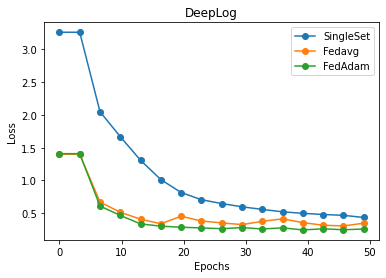

In [13]:
name = ['SingleSet', 'Fedavg', 'FedAdam']
data_1 = ['baseline_dl', 'dl_avg_loss', 'dl_adam_loss']
data_2 = ['baseline_la', 'la_avg_loss', 'la_adam_loss']

for j, i in enumerate(data_1):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('DeepLog')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_v2/dl_fl_useful.svg',dpi=600, bbox_inches='tight', format="svg")
plt.show()

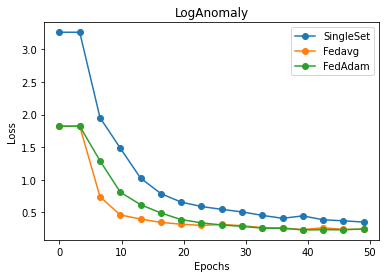

In [14]:
name = ['SingleSet', 'Fedavg', 'FedAdam']
data_1 = ['baseline_dl', 'dl_avg_loss', 'dl_adam_loss']
data_2 = ['baseline_la', 'la_avg_loss', 'la_adam_loss']

for j, i in enumerate(data_2):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('LogAnomaly')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_v2/la_fl_useful.svg', bbox_inches='tight', format="svg")
plt.show()

# Fig 2.

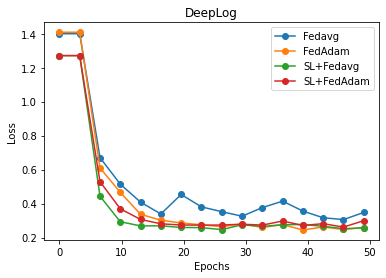

In [15]:
name = ['Fedavg', 'FedAdam', 'SL+Fedavg', 'SL+FedAdam']
data_1 = ['dl_avg_loss', 'dl_adam_loss', 'sldl_avg_loss', 'sldl_adam_loss']
data_2 = ['la_avg_loss', 'la_adam_loss', 'slla_avg_loss', 'slla_adam_loss']

for j, i in enumerate(data_1):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('DeepLog')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_v2/dl_sl_before_after.svg', bbox_inches='tight', format="svg")
plt.show()

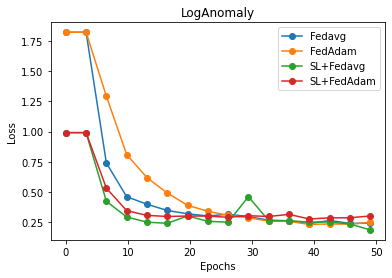

In [16]:
name = ['Fedavg', 'FedAdam', 'SL+Fedavg', 'SL+FedAdam']
data_1 = ['dl_avg_loss', 'dl_adam_loss', 'sldl_avg_loss', 'sldl_adam_loss']
data_2 = ['la_avg_loss', 'la_adam_loss', 'slla_avg_loss', 'slla_adam_loss']

for j, i in enumerate(data_2):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('LogAnomaly')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_v2/la_sl_before_after.svg', bbox_inches='tight', format="svg")
plt.show()

# Fig 3.

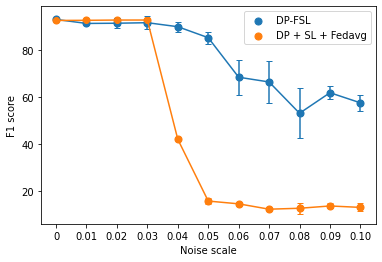

In [5]:
f1_adam = [94.3, 93.197,91.49933333,91.58833333,91.81433333,90.10846667,85.437,68.6103,66.59066667,53.277,62.01615111,57.71359434]
err_adam = [0.469696178,0.747094372,0.291897528,2.024911521,2.748092187,2.141356586,2.507198536,7.412396812,8.8004892,10.62657897,2.85519043,3.40316899]

name = ['0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09', '0.10']

f1_avg = [93.558, 92.77433333, 92.83133333, 92.94233333, 92.948, 42.19966667, 15.90566667, 14.72366667, 12.446, 12.83466667, 13.81666667, 13.21166667]
err_avg = [0, 0.001, 0.0845, 0.0115, 0.0285, 0.011, 1.349, 0.329, 0.441, 2.4015, 1.0715, 1.726]

# (_, caps1, _) = plt.errorbar(name, f1_adam[1:], err_adam[1:], marker = 'o', capsize=3, linestyle='None')
# #, linestyle='None'
# for cap in caps1:
#     cap.set_markeredgewidth(1)
# plt.scatter(name, f1_adam[1:],s = 50, marker = 'o')
# (_, caps2, _) = plt.errorbar(name, f1_avg[1:], err_avg[1:], marker = 'o', capsize=3, linestyle='None')
# for cap in caps2:
#     cap.set_markeredgewidth(1)
# plt.scatter(name, f1_avg[1:],s = 50, marker = 'o')

(_, caps1, _) = plt.errorbar(name, f1_adam[1:], err_adam[1:], marker = 'o', capsize=3)
for cap in caps1:
    cap.set_markeredgewidth(1)
plt.scatter(name, f1_adam[1:],s = 50, marker = 'o')
(_, caps2, _) = plt.errorbar(name, f1_avg[1:], err_avg[1:], marker = 'o', capsize=3)
for cap in caps2:
    cap.set_markeredgewidth(1)
plt.scatter(name, f1_avg[1:],s = 50, marker = 'o')


plt.xlabel('Noise scale')
plt.ylabel('F1 score')
plt.legend(("DP-FSL", "DP + SL + Fedavg"))
plt.plot()
if save_fig:
    plt.savefig('../result/fig_v2/dpslfl_all_noise.svg', bbox_inches='tight', format="svg")
plt.show()

# Fig 4.

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


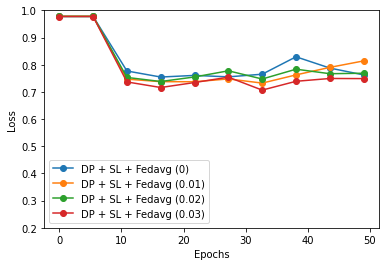

In [9]:
name = ['SLFedavg', 'DP + SL + Fedavg (0)', 'DP + SL + Fedavg (0.01)','DP + SL + Fedavg (0.02)', 'DP + SL + Fedavg (0.03)',  'DPSLFedavg (0.07)', 'DPSLFedavg (0.10)']
data = ['la_avg_x_loss', 'la_avg_0_loss', 'la_avg_001_loss', 'la_avg_002_loss', 'la_avg_003_loss']
for j, i in enumerate(data[1:]):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/5))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j+1], marker = 'o')
        continue
        
    plt.plot(x, y, label = name[j+1], marker = 'o')

plt.xlabel('Epochs')
tt = np.arange(0.2,1.1,0.1)
plt.yticks(tt)
plt.ylabel('Loss')
# if 'train' in want_data:
#     plt.title('Training Loss')
# else:
#     plt.title('SL + Fedavg on LogAnomaly')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_v2/dpslfedavg_noise.svg', bbox_inches='tight', format="svg")
plt.show()

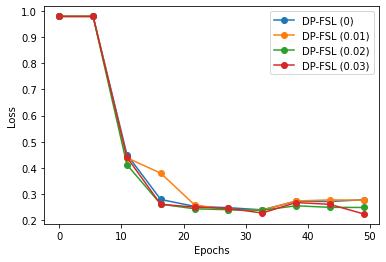

In [10]:
name = ['SL+Fedadam', 'DP-FSL (0)', 'DP-FSL (0.01)','DP-FSL (0.02)', 'DP-FSL (0.03)']
data = ['la_x_loss', 'la_0_loss', 'la_001_loss', 'la_002_loss', 'la_003_loss']
for j, i in enumerate(data[1:]):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/5))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j+1], marker = 'o')
        continue
    plt.plot(x, y, label = name[j+1], marker = 'o')

plt.xlabel('Epochs')
plt.ylabel('Loss')
# if 'train' in want_data:
#     plt.title('Training Loss')
# else:
#     plt.title('DP-FSL on LogAnomaly')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_v2/dpslfedadam_noise.svg', bbox_inches='tight', format="svg")
plt.show()